In [ ]:
# Importing important libraries
import pandas as pd
import seaborn as sns
from textblob import TextBlob
from sklearn.model_selection import train_test_split
import nltk
from gensim.models import Word2Vec
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [ ]:
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.9 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=9fc6b5028c6547b431f511951b2deb066fc3b4ee740718f69d537fec6b6906ac
  Stored in directory: /root/.cache/pip/wheels/6c/bd/3e/2d6afc9bc36c9975f8e4215a270bbac6580c4361ebd6bb2323
Successfully built swifter


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading csv file into dataframe
reviews = pd.read_csv("/content/drive/MyDrive/SMM project/updated_mobile_reviews_lang_new.csv",index_col=False)

<ipython-input-4-0e0eebc10121>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv("/content/drive/MyDrive/SMM project/updated_mobile_reviews_lang_new.csv",index_col=False)


In [ ]:
reviews.shape

(82816, 11)

In [ ]:
reviews.head()

,Unnamed: 0,asin,name,rating,date,verified,title,title_lang,body,body_lang,helpfulVotes
0,0.0,B0000SX2UC,Janet,3.0,"October 11, 2005",False,"Def not best, but not worst",en,I had the Samsung A600 for awhile which is abs...,en,1.0
1,1.0,B0000SX2UC,Luke Wyatt,1.0,"January 7, 2004",False,Text Messaging Doesn't Work,en,Due to a software issue between Nokia and Spri...,en,17.0
2,2.0,B0000SX2UC,Brooke,5.0,"December 30, 2003",False,Love This Phone,en,"This is a great, reliable phone. I also purcha...",en,5.0
3,3.0,B0000SX2UC,amy m. teague,3.0,"March 18, 2004",False,"Love the Phone, BUT...!",en,"I love the phone and all, because I really did...",en,1.0
4,4.0,B0000SX2UC,tristazbimmer,4.0,"August 28, 2005",False,"Great phone service and options, lousy case!",en,The phone has been great for every purpose it ...,en,1.0


In [ ]:
# Selecting only those reviews that have either the title or body or both in english language
# reviews = reviews[(reviews['title_lang'] == 'en') | (reviews['body_lang'] == 'en')]
reviews = reviews[(reviews['body_lang'] == 'en')]
reviews.shape

(79432, 11)

In [ ]:
reviews.columns

Index(['Unnamed: 0', 'asin', 'name', 'rating', 'date', 'verified', 'title',
       'title_lang', 'body', 'body_lang', 'helpfulVotes'],
      dtype='object')

In [ ]:
 #Removing columns that are not required:
reviews = reviews.drop(columns=['Unnamed: 0', 'asin', 'name', 'date', 'verified', 'helpfulVotes'])
reviews.columns

Index(['rating', 'title', 'title_lang', 'body', 'body_lang'], dtype='object')

In [ ]:
reviews.head()

,rating,title,title_lang,body,body_lang
0,3.0,"Def not best, but not worst",en,I had the Samsung A600 for awhile which is abs...,en
1,1.0,Text Messaging Doesn't Work,en,Due to a software issue between Nokia and Spri...,en
2,5.0,Love This Phone,en,"This is a great, reliable phone. I also purcha...",en
3,3.0,"Love the Phone, BUT...!",en,"I love the phone and all, because I really did...",en
4,4.0,"Great phone service and options, lousy case!",en,The phone has been great for every purpose it ...,en


In [ ]:
# Checking for NaN
reviews.isnull().values.any()

True

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79432 entries, 0 to 82815
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rating      79431 non-null  float64
 1   title       79421 non-null  object 
 2   title_lang  79432 non-null  object 
 3   body        79411 non-null  object 
 4   body_lang   79432 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.6+ MB


Getting all the rows that have atleast 1 NaN to observe and take a decision on what to do with them

In [ ]:
reviews[reviews['rating'].isnull()]

,rating,title,title_lang,body,body_lang
82815,NaN,NaN,en,NaN,en


In [ ]:
reviews[reviews['title'].isnull()]

,rating,title,title_lang,body,body_lang
27707,1.0,NaN,en,Battery doesn't work as new one...,en
45093,5.0,NaN,en,Almost like pretty new,en
46648,5.0,NaN,en,Love this phone. Everything's worked great. So...,en
63737,5.0,NaN,en,"I get that phone I needed ,, thanks .",en
64792,5.0,NaN,en,Love the phone,en
65788,5.0,NaN,en,Great phone,en
68747,5.0,NaN,en,Great phone...A++,en
78216,5.0,NaN,en,It was s good purchase,en
79129,5.0,NaN,en,Good value for price!,en
80337,5.0,NaN,en,It was okay no dislikes yet,en


In [ ]:
reviews[reviews['body'].isnull()]

,rating,title,title_lang,body,body_lang
9840,3.0,Three Stars,en,NaN,en
19026,4.0,Four Stars,en,NaN,en
21385,5.0,Nice and fast shipment,en,NaN,en
21394,1.0,Damaged,en,NaN,en
23640,2.0,The Wrong Phone Color,en,NaN,en
24644,1.0,One Star,en,NaN,en
26433,2.0,The Wrong Phone Color,en,NaN,en
28359,1.0,DON'T BUY FROM CLEAN ELECTRIC!!!!!,en,NaN,en
28605,1.0,I regret this purchase!,en,NaN,en
39664,5.0,Hi,en,NaN,en


In [ ]:
# Replacing NaN values of title with empty string
reviews[['title','body' ]] = reviews[['title','body' ]].fillna('')
# Removing rows that don't have any rating
reviews = reviews.dropna(subset=['rating'])

In [ ]:
# Checking for NaN
reviews.isnull().values.any()

False

In [ ]:
# Create quick lambda functions to find the polarity of each review based on rating
# 4.0-5.0 : Postive
# 3.0 : Neutral
# 1.0-2.0 : Negative

reviews["sentiment"] = reviews["rating"].apply(lambda x: 'Positive' if x>3 else('Neutral' if x==3 else 'Negative'))

In [ ]:
reviews.head()

,rating,title,title_lang,body,body_lang,sentiment
0,3.0,"Def not best, but not worst",en,I had the Samsung A600 for awhile which is abs...,en,Neutral
1,1.0,Text Messaging Doesn't Work,en,Due to a software issue between Nokia and Spri...,en,Negative
2,5.0,Love This Phone,en,"This is a great, reliable phone. I also purcha...",en,Positive
3,3.0,"Love the Phone, BUT...!",en,"I love the phone and all, because I really did...",en,Neutral
4,4.0,"Great phone service and options, lousy case!",en,The phone has been great for every purpose it ...,en,Positive


In [ ]:
reviews.sentiment.value_counts()

Positive    53116
Negative    20687
Neutral      5628
Name: sentiment, dtype: int64

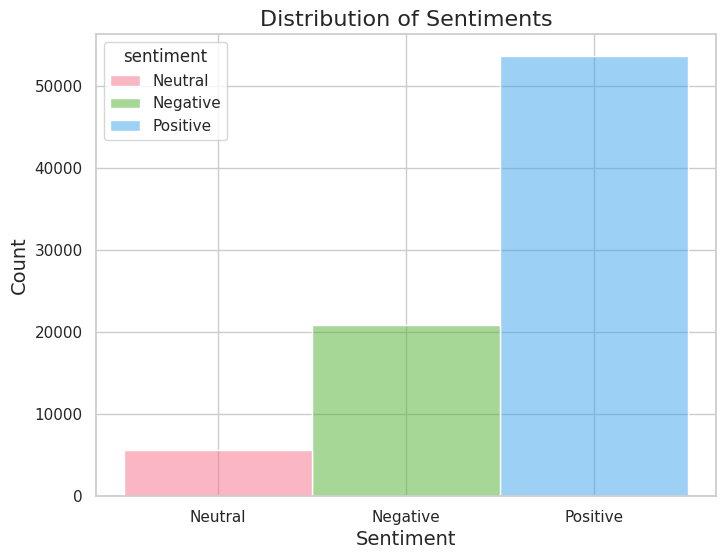

In [ ]:
# Sentiments distribution

# Create a histogram plot using Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=reviews, x='sentiment', hue='sentiment', palette='husl')
ax.set_title('Distribution of Sentiments', fontsize=16)
ax.set_xlabel('Sentiment', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Show the plot
plt.show()


In [ ]:
# Remove duplicates
reviews = reviews.drop_duplicates(subset=['title', 'body'], keep='first')

In [ ]:
reviews.shape

(72425, 6)

In [ ]:
# from sklearn.utils import resample

In [ ]:
# negative_df = reviews[reviews['sentiment'] == 'Negative']
# neutral_df = reviews[reviews['sentiment'] == 'Neutral']
# positive_df= reviews[reviews['sentiment'] == 'Positive']
# negative_df_resampled = resample(negative_df, replace=True, n_samples=len(positive_df), random_state=42)
# neutral_df_resampled = resample(neutral_df, replace=True, n_samples=len(positive_df), random_state=42)

In [ ]:
# reviews_resampled = pd.concat([positive_df, negative_df_resampled, neutral_df_resampled])

In [ ]:
# reviews_resampled['sentiment'].value_counts()

In [ ]:
# X_resampled = reviews_resampled[['title', 'body']]
# y_resampled = reviews_resampled['sentiment']

In [ ]:
# sns.set(style='whitegrid')
# plt.figure(figsize=(8, 6))
# ax = sns.histplot(data=reviews_resampled, x='sentiment', hue='sentiment', palette='husl')
# ax.set_title('Distribution of Sentiments after Resampling', fontsize=16)
# ax.set_xlabel('Sentiment', fontsize=14)
# ax.set_ylabel('Count', fontsize=14)

# # Show the plot
# plt.show()

In [ ]:
# reviews = reviews_resampled
# reviews.shape

In [ ]:
import swifter

In [ ]:
# Define a function to lowercase all words in a text, except for uppercase words
def lowercase_all_except_uppercase(text):
    words = text.split()
    for i in range(len(words)):
        # Check if the word is not completely uppercase
        if not words[i].isupper():
            words[i] = words[i].lower()
    return ' '.join(words)

# Apply the function to 'title' and 'body' columns of the DataFrame
# reviews['title'] = reviews['title'].swifter.apply(lowercase_all_except_uppercase)
reviews['body'] = reviews['body'].swifter.apply(lowercase_all_except_uppercase)

Pandas Apply:   0%|          | 0/72425 [00:00<?, ?it/s]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


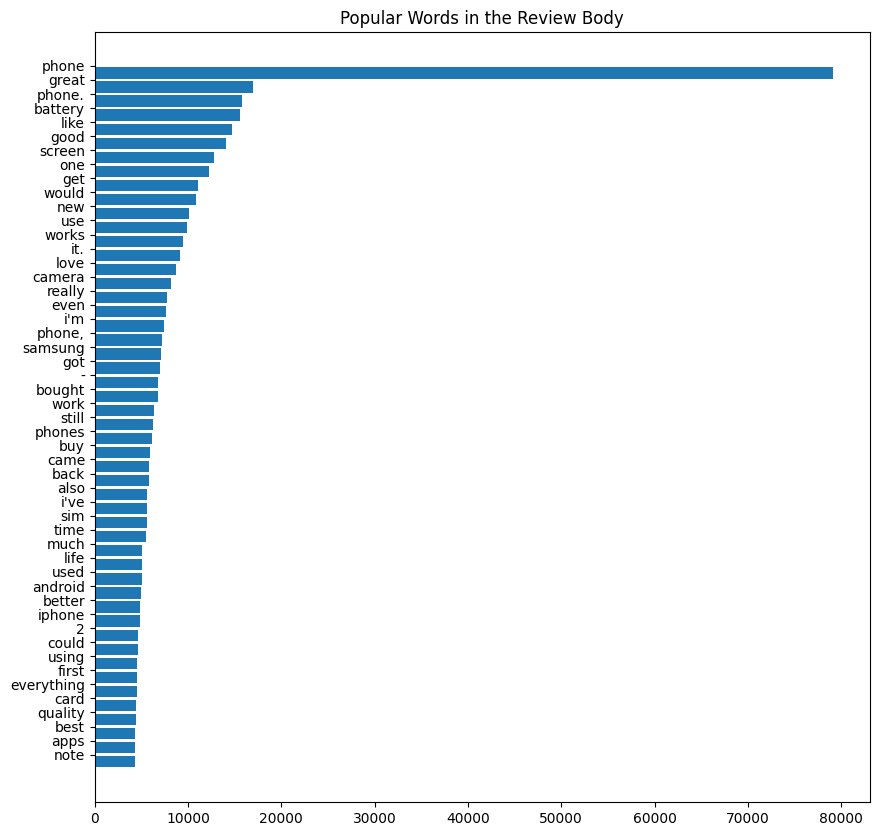

In [ ]:
#Visualisation of data
#nltk.download('stopwords')
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stop_words]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

plt.figure(figsize=(10,10))
wordBarGraphFunction(reviews,'body',"Popular Words in the Review Body")


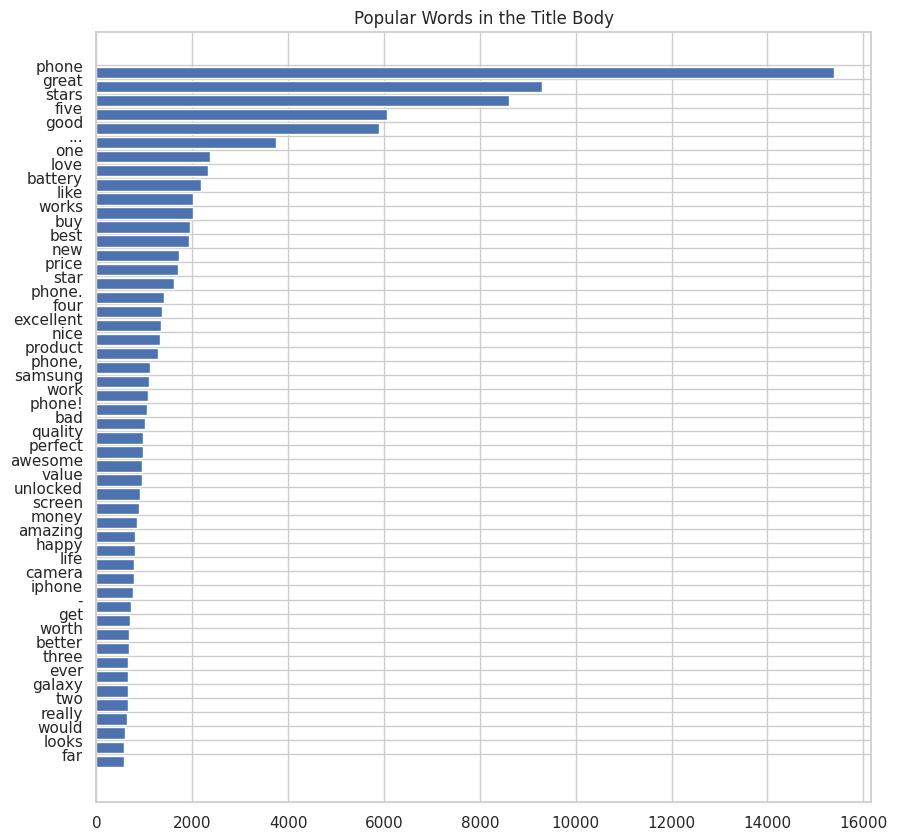

In [ ]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(reviews,'title',"Popular Words in the Title Body")

In [ ]:
# #Check for duplicate reviews:
# reviews[reviews.duplicated()]

In [ ]:
# reviews = reviews.drop_duplicates(subset=['title', 'body'], keep='first')

In [ ]:
# reviews.shape

In [ ]:
#Remove stop words
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
    return ' '.join(filtered_words)

# reviews['title'] = reviews['title'].swifter.apply(remove_stopwords)
reviews['body'] = reviews['body'].swifter.apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Pandas Apply:   0%|          | 0/72425 [00:00<?, ?it/s]

In [ ]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622380 sha256=afa1d7aef8e5305a8b837102b593ed2360b39bb0114773b10ccddcf996505ce1
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:
# #spelling corrections
# #Reference-> https://dataaspirant.com/nlp-text-preprocessing-techniques-implementation-python/#t-1600077497355
from autocorrect import Speller

# create an instance of the Speller class for english language
spell = Speller(lang='en')

def correct_spelling(text):
    corrected_words = [spell(word) for word in text.split()]
    corrected_text = ' '.join(corrected_words)
    return corrected_text

# reviews['title'] = reviews['title'].swifter.apply(correct_spelling)
reviews['body'] = reviews['body'].swifter.apply(correct_spelling)

Pandas Apply:   0%|          | 0/72425 [00:00<?, ?it/s]

In [ ]:
dummy = pd.DataFrame()
dummy = reviews


In [ ]:
reviews = dummy

In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=57a4124ba4cd16db18a6aef5a316266a465e116b5b821b6feb86b37a5ee373d4
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [ ]:
# import advertools as adv
import emoji

In [ ]:
# Function to replace emojis with their word forms without the "_face" suffix using advertools
# def replace_emojis_with_words(text):
#     return adv.emoji_to_word(text, remove_face=True)
# Function to replace emojis with their word forms without the "_face" suffix


def replace_emojis_with_words(text):
    return emoji.demojize(text).replace('_', ' ')



In [ ]:
# uncomment for replacing emojis
# reviews['title'] = reviews['title'].swifter.apply(replace_emojis_with_words)

Pandas Apply:   0%|          | 0/72820 [00:00<?, ?it/s]

In [ ]:
#uncomment for replacing emojis
reviews['body'] = reviews['body'].swifter.apply(replace_emojis_with_words)

Pandas Apply:   0%|          | 0/72425 [00:00<?, ?it/s]

In [ ]:
# Dictionary to map emojis to word forms
emoji_mapping = {'XD': 'laughing',
                 'LOL': 'laughing',
                 'ROFL': 'laughing',
                 ':-)': 'smiley',
                 ':)': 'smiley',
                 ':-(': 'sad',
                 ':(': 'sad',
                 ':D': 'laughing',
                 ':P': 'tongue_out',
                 ';)': 'wink',
                 ':|': 'neutral',
                 ':O': 'surprised',
                 ':*': 'kiss',
                 ':@': 'angry',
                 ':/': 'confused',
                 ':S': 'confused',
                 ':$': 'embarrassed',
                 ':|': 'straight_face',
                 '>:(': 'angry_face',
                 ':\\': 'skeptical',
                 ':\'(': 'crying',
                 '+1': 'thumbs_up',
                 '-1': 'thumbs_down',
                 '<3': 'heart'}

# Function to replace text-based emojis with their word forms
def replace_text_emojis_with_words(text):
    for key, value in emoji_mapping.items():
        text = text.replace(key, value)
    return text
#uncomment for replacing emojis
# reviews['title'] = reviews['title'].swifter.apply(replace_text_emojis_with_words)

reviews['body'] = reviews['body'].swifter.apply(replace_text_emojis_with_words)

Pandas Apply:   0%|          | 0/72425 [00:00<?, ?it/s]

In [ ]:
# Experiments after model creating:
# Leave spellings in
# Correct spellings

# Correcting spelling errors
# Need to create a custome one  -  In progress
# # Define custom spelling correction dictionary for domain-specific terms
# custom_spelling_dict = {"mobil": "mobile", "reivew": "review", "exampel": "example"}

# # Function to apply custom spelling correction using the dictionary
# def apply_custom_spelling_correction(text):
#     words = text.split()
#     corrected_words = [custom_spelling_dict.get(word, word) for word in words]
#     corrected_text = " ".join(corrected_words)
#     return corrected_text

# Function to perform spelling correction using TextBlob for a single text
# def perform_textblob_spelling_correction(text):
#     # Apply standard spelling correction using TextBlob
#     corrected_text_blob = TextBlob(text).correct()
#     corrected_text = str(corrected_text_blob)

#     # Apply custom spelling correction using the custom dictionary
#     # corrected_text = apply_custom_spelling_correction(corrected_text)

#     return corrected_text




In [ ]:
# reviews['title'] = reviews['title'].swifter.apply(perform_textblob_spelling_correction)

In [ ]:
# reviews['body'] = reviews['body'].swifter.apply(perform_textblob_spelling_correction)

In [ ]:
#Reference-> https://www.kaggle.com/code/naureenmohammad/nlp-on-disaster-tweet-final
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
abbreviations = pd.read_csv("/content/drive/MyDrive/SMM project/Abbreviations and Slang.csv")
abrevtn_dic = dict(zip(abbreviations.Abbreviations, abbreviations.Text))

def abbrev2_word(word):
    word= word.lower()
    if word in abrevtn_dic.keys():
        return abrevtn_dic[word]
    else:
        return word

def abbrev2_text(text):
    sentnc = word_tokenize(text)
    sentnc = [abbrev2_word(word) for word in sentnc]
    text = ' '.join(sentnc)
    return text

# reviews["title"] = reviews["title"].swifter.apply(lambda x: abbrev2_text(x))
reviews["body"] = reviews["body"].swifter.apply(lambda x: abbrev2_text(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Pandas Apply:   0%|          | 0/72425 [00:00<?, ?it/s]

In [ ]:
import re
pattern = r'(\w)\1{3,}'
def remove_repeating_chars(text):
#replace repeating character with single charater
    return re.sub(pattern, r'\1', text)
# reviews['title'] = reviews['title'].swifter.apply(remove_repeating_chars)
reviews['body'] = reviews['body'].swifter.apply(remove_repeating_chars)

Pandas Apply:   0%|          | 0/72425 [00:00<?, ?it/s]

In [ ]:
#remove punctuations
import string

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# reviews['title'] = reviews['title'].swifter.apply(remove_punctuation)
reviews['body'] = reviews['body'].swifter.apply(remove_punctuation)

Pandas Apply:   0%|          | 0/72425 [00:00<?, ?it/s]

In [ ]:
# pip install autocorrect

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# reviews['title'] = reviews['title'].swifter.apply(lemmatize_text)
reviews['body'] = reviews['body'].swifter.apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


Pandas Apply:   0%|          | 0/72425 [00:00<?, ?it/s]

In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout, Activation
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Embedding, Bidirectional, LSTM

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# lb=LabelEncoder()
# reviews['sentiment']=lb.fit_transform(reviews['sentiment'])

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

# Define hyperparameters
# csv_file = 'sentiment_data.csv'
max_len = 100
max_words = 10000
embedding_dim = 100
lstm_units = 64
dropout_rate = 0.5
batch_size = 32
epochs = 10

# Load data
df = reviews
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(reviews['body'])
sequences = tokenizer.texts_to_sequences(reviews['body'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Convert labels to categorical
labels = np.array(pd.get_dummies(df['sentiment']))

# Split data into train and test sets
train_size = int(0.8 * len(df))
train_data = padded_sequences[:train_size]
train_labels = labels[:train_size]
test_data = padded_sequences[train_size:]
test_labels = labels[train_size:]

# Define a bi-LSTM model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(lstm_units)))
model.add(Dropout(dropout_rate))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 1,084,867
Trainable params: 1,084,867
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1449/1449 [==============================] - 235s 159ms/step - loss: 0.5131 - accuracy: 0.8139 - val_

In [ ]:
from sklearn.metrics import classification_report
# Make predictions on test data
y_pred = np.argmax(model.predict(test_data), axis=-1)
y_true = np.argmax(test_labels, axis=-1)

# Print classification report
target_names = ['Negative', 'Neutral', 'Positive']
print(classification_report(y_true, y_pred, target_names=target_names))

453/453 [==============================] - 16s 33ms/step
              precision    recall  f1-score   support

    Negative       0.66      0.72      0.69      2728
     Neutral       0.19      0.15      0.17       906
    Positive       0.91      0.91      0.91     10851

    accuracy                           0.83     14485
   macro avg       0.59      0.59      0.59     14485
weighted avg       0.82      0.83      0.82     14485



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from imblearn.over_sampling import RandomOverSampler

# Define hyperparameters
max_len = 100
max_words = 10000
embedding_dim = 100
lstm_units = 64
dropout_rate = 0.5
batch_size = 32
epochs = 10

# Load data
df = reviews
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(reviews['body'])
sequences = tokenizer.texts_to_sequences(reviews['body'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Convert labels to categorical
labels = np.array(pd.get_dummies(df['sentiment']))

# Upsample the minority classes
ros = RandomOverSampler(random_state=42)
padded_sequences, labels = ros.fit_resample(padded_sequences, labels)

# Split data into train and test sets
train_size = int(0.8 * len(padded_sequences))
train_data = padded_sequences[:train_size]
train_labels = labels[:train_size]
test_data = padded_sequences[train_size:]
test_labels = labels[train_size:]

# Define a bi-LSTM model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(lstm_units)))
model.add(Dropout(dropout_rate))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 bidirectional_4 (Bidirectio  (None, 128)              84480     
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1,084,867
Trainable params: 1,084,867
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2858/2858 [==============================] - 457s 157ms/step - loss: 0.4458 - accuracy: 0.8460 - va

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Bidirectional, Dense, Dropout
from sklearn.metrics import classification_report

# Define hyperparameters
# csv_file = 'sentiment_data.csv'
max_len = 100
max_words = 10000
embedding_dim = 100
rnn_units = 64
dropout_rate = 0.5
batch_size = 32
epochs = 10

# Load data
df = reviews
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['body'])
sequences = tokenizer.texts_to_sequences(df['body'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Convert labels to categorical
labels = np.array(pd.get_dummies(df['sentiment']))

# Split data into train and test sets
train_size = int(0.8 * len(df))
train_data = padded_sequences[:train_size]
train_labels = labels[:train_size]
test_data = padded_sequences[train_size:]
test_labels = labels[train_size:]

# Define a bi-RNN model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Bidirectional(SimpleRNN(rnn_units)))
model.add(Dropout(dropout_rate))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Make predictions on test data
y_pred = np.argmax(model.predict(test_data), axis=-1)
y_true = np.argmax(test_labels, axis=-1)

# Print classification report
target_names = ['Negative', 'Neutral', 'Positive']
print(classification_report(y_true, y_pred, target_names=target_names))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 bidirectional_10 (Bidirecti  (None, 128)              21120     
 onal)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 3)                 387       
                                                                 
Total params: 1,021,507
Trainable params: 1,021,507
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1449/1449 [==============================] - 139s 94ms/step - loss: 0.5921 - accuracy: 0.7855 - va

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.utils import class_weight
from sklearn.utils import resample

# Define hyperparameters
max_len = 100
max_words = 10000
embedding_dim = 100
lstm_units = 64
dropout_rate = 0.5
batch_size = 32
epochs = 10

# Load data
df = reviews
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(reviews['body'])
sequences = tokenizer.texts_to_sequences(reviews['body'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Upsample minority classes
# class_weights = class_weight.compute_class_weight('balanced', np.unique(df['sentiment']), df['sentiment'])
# class_weights_dict = dict(enumerate(class_weights))
neg_indices = df[df['sentiment'] == 0].index
neu_indices = df[df['sentiment'] == 1].index
pos_indices = df[df['sentiment'] == 2].index
num_samples = max(len(df[df['sentiment'] == 1]), len(df[df['sentiment'] == 0]))
df_neg_upsampled = resample(df.loc[neg_indices], replace=True, n_samples=num_samples, random_state=42)
df_neu_upsampled = resample(df.loc[neu_indices], replace=True, n_samples=num_samples, random_state=42)
df_pos_upsampled = resample(df.loc[pos_indices], replace=True, n_samples=num_samples, random_state=42)
df_upsampled = pd.concat([df_neg_upsampled, df_neu_upsampled, df_pos_upsampled])
df = df_upsampled.sample(frac=1)

# Convert labels to categorical
labels = np.array(pd.get_dummies(df['sentiment']))

# Split data into train and test sets
train_size = int(0.8 * len(df))
train_data = padded_sequences[:train_size]
train_labels = labels[:train_size]
test_data = padded_sequences[train_size:]
test_labels = labels[train_size:]

# Define a bi-LSTM model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(lstm_units)))
model.add(Dropout(dropout_rate))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              84480     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1,084,867
Trainable params: 1,084,867
Non-trainable params: 0
_________________________________________________________________


ValueError: ignored